In [1]:
import osmnx as ox
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
infected = pd.read_excel('Data//Historic COVID-19 Dashboard Data.xlsx', sheet_name='UTLAs', skiprows=7)
deaths = pd.read_excel('Data//COVID-19-total-announced-deaths-10-April-2020.xlsx', sheet_name='COVID19 total deaths by trust', skiprows=15)
population_density = pd.read_csv('Data//UK_population_densities.csv')
population = pd.read_csv('Data//UK_populations.csv')

In [3]:
broken_regions = {'Leicester': 'City of Leicester', 'Peterborough': 'City of Peterborough',
'Barnet': 'London Borough of Barnet', 'Bexley': 'London Borough of Bexley', 'Bromley': 'London Borough of Bromley',
'Camden': 'London Borough of Camden', 'Croydon': 'London Borough of Croydon', 'Ealing': 'London Borough of Ealing',
'Greenwich': 'Royal Borough of Greenwich', 'Hackney and City of London': 'London Borough of Hackney',
'Hammersmith and Fulham': 'London Borough of Hammersmith and Fulham', 'Hounslow': 'London Borough of Hounslow',
'Islington': 'London Borough of Islington', 'Kensington and Chelsea': 'Royal Borough of Kensington and Chelsea',
'Kingston upon Thames': 'Royal Borough of Kingston upon Thames', 'Lambeth': 'London Borough of Lambeth',
'Lewisham': 'London Borough of Lewisham', 'Redbridge': 'London Borough of Redbridge', 
'Southwark': 'London Borough of Southwark', 'Tower Hamlets': 'Dover', 'Waltham Forest': 'Canterbury',
'Wandsworth': 'London Borough of Wandsworth', 'Westminster': 'City of Westminster',
'Enfield': 'London Borough of Enfield', 'Cornwall and Isles of Scilly': 'Cornwall'}

In [4]:
infected = infected.replace({"Area Name": broken_regions})[1:-1]

In [5]:
results = ox.gdf_from_places(list(infected['Area Name'] + ', UK'))
results['Area Name'] = list(infected['Area Name'])
regions = results[results.geom_type.isin(['Polygon','MultiPolygon'])]

In [7]:
missing_regions = results['Area Name'][~results.geom_type.isin(['Polygon','MultiPolygon'])]
n = len(missing_regions)

r = 2
while n != 0:
    retry = ox.gdf_from_places(missing_regions + ', UK', which_results = [r] * n)
    retry['Area Name'] = list(missing_regions)
    retry_polys = retry[retry.geom_type.isin(['Polygon','MultiPolygon'])]
    regions = pd.concat([regions, retry_polys])
    missing_regions = retry['Area Name'][~retry.geom_type.isin(['Polygon','MultiPolygon'])]
    n = len(missing_regions)
    r += 1

In [20]:
infected.iloc[:,[1,-1]].merge(regions, on='Area Name')

,Area Name,2020-04-09 00:00:00.1,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,Hartlepool,64,"POLYGON ((-1.38375 54.64622, -1.38372 54.64598...","Hartlepool, North East England, England, Unite...",54.727179,54.621658,-1.147528,-1.383754
1,Middlesbrough,235,"POLYGON ((-1.28250 54.56529, -1.27757 54.56052...","Middlesbrough, North East England, England, Un...",54.591401,54.510760,-1.160666,-1.282499
2,Redcar and Cleveland,139,"POLYGON ((-1.20173 54.57755, -1.20029 54.57689...","Redcar and Cleveland, North East England, Engl...",54.647976,54.487835,-0.788414,-1.201729
3,Stockton-on-Tees,173,"POLYGON ((-1.37250 54.56924, -1.36262 54.55516...","Stockton-on-Tees, North East England, England,...",54.594889,54.533750,-1.261136,-1.372497
4,Darlington,109,"POLYGON ((-1.70975 54.56519, -1.70973 54.56499...","Darlington, North East England, England, Unite...",54.619356,54.451126,-1.407280,-1.709755
...,...,...,...,...,...,...,...,...
144,Suffolk,360,"POLYGON ((0.33997 52.26767, 0.34057 52.26727, ...","Suffolk, East of England, England, United Kingdom",52.550222,51.931764,1.768912,0.339975
145,Surrey,1238,"POLYGON ((-0.84893 51.21072, -0.84866 51.21046...","Surrey, South East, England, United Kingdom",51.471564,51.071497,0.058216,-0.848929
146,Warwickshire,513,"POLYGON ((-1.96201 52.17083, -1.96197 52.17072...","Warwickshire, West Midlands, England, United K...",52.687244,51.955394,-1.172126,-1.962007
147,West Sussex,363,"POLYGON ((-0.95760 50.89064, -0.95660 50.88983...","West Sussex, South East, England, United Kingdom",51.167301,50.722029,0.044550,-0.957597


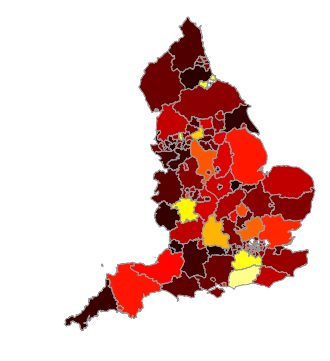

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a28a19790>)

In [34]:
cmap = cm.hot
x = infected.iloc[:,-1]
norm = Normalize(vmin=min(x), vmax=max(x))
m = cm.ScalarMappable(norm=norm, cmap=cmap)
ox.plot_shape(ox.project_gdf(regions), fc=m.to_rgba(x))